In [1]:
cd ..

/Users/flamholz/Documents/workspace/ccm_evolution


In [2]:
!mkdir -p figures/fig3
!mkdir -p figures/fig4
!mkdir -p figures/fig6

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from statannot import add_stat_annotation


In [4]:
# Load data investigating effects of encapsulation
df_amb = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_encapsulation_timecourses/090720_ED_OD600_ambientCO2.csv')
df_pt5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_encapsulation_timecourses/072720_ED_OD600_0.5pctCO2.csv')
df_1pt5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_encapsulation_timecourses/090720_ED_OD600_1.5pctCO2.csv')
df_5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_encapsulation_timecourses/072720_ED_OD600_5pctCO2.csv')

co2_dfs_encap = [df_amb, df_pt5pct, df_1pt5pct, df_5pct]
co2_conds = 'amb,0.5%,1.5%,5%'.split(',')

In [5]:
# Load data investigating effects of a futile cycle
df_pt5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_futile_cycle_data/011120_futile_cycle_0.5%.csv')
df_1pt5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_futile_cycle_data/011120_futile_cycle_1.5%.csv')
df_5pct = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_futile_cycle_data/050321_futile_cycle_5%.csv')
df_amb = pd.read_csv('data/Ecoli_CCMB1/EJD_2020_futile_cycle_data/050321_futile_cycle_amb.csv')

co2_dfs_futcyc = [df_amb, df_pt5pct, df_1pt5pct, df_5pct]

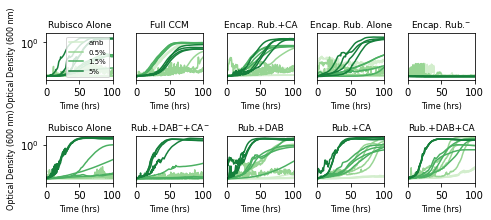

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(7,3))

xlim = (0, 100)
ylim = (0.03, 2.2)

# Plot the encapsulation data up top
inactive_rub = "CCMB1:pCB' K194M+pCCM'"
rub_alone = "CCMB1:p1A+pFA-sfGFP"
rub_encap = "CCMB1:pCB' C173S+pFA-sfGFP"
rub_ca_encap = "CCMB1:pCB'+pFA-sfGFP"
full_ccm = "CCMB1:pCB'+pCCM'"
strain_names_encap = [rub_alone, full_ccm, rub_ca_encap, rub_encap, inactive_rub]
titles_encap = 'Rubisco Alone,Full CCM,Encap. Rub.+CA,Encap. Rub. Alone,Encap. Rub.$^{-}$'.split(',')

pal = sns.color_palette('Greens', n_colors=4)
for strain, ax in zip(strain_names_encap, axs[0,:].flatten()):
    plt.sca(ax)
    cols = [strain+'.{0}'.format(i) for i in range(1,5)]
    for j, my_df in enumerate(co2_dfs_encap):
        time_h = my_df.time_s / 60 / 60
        label = co2_conds[j]
        for col in cols:
            plt.semilogy(time_h, my_df[col], color=pal[j], label=label)
            label = None
    
# Plot the futile cycle data below
rub_alone = "cLS/AGFP"
futile_cycle = "cLS/Dab2-Can"
plus_transport = "cLS/Dab2-dCan"
plus_ca = "cLS/dDab2-Can"
double_neg = "cLS/dDab2-dCan"
strain_names_futcyc = [rub_alone, double_neg, plus_transport, plus_ca, futile_cycle]
titles_futcyc = 'Rubisco Alone,Rub.+DAB$^{-}$+CA$^{-}$,Rub.+DAB,Rub.+CA,Rub.+DAB+CA'.split(',')
titles = titles_encap + titles_futcyc

for strain, ax in zip(strain_names_futcyc, axs[1,:].flatten()):
    plt.sca(ax)
    cols = [strain+' {0}'.format(i) for i in range(1,5)]
    for j, my_df in enumerate(co2_dfs_futcyc):
        time_h = my_df.time_s / 60 / 60
        label = co2_conds[j]
        for col in cols:
            plt.semilogy(time_h, my_df[col], color=pal[j], label=label)
            label = None
    
for i, (title, ax) in enumerate(zip(titles, axs.flatten())):
    plt.sca(ax)
    plt.title(title, fontsize=9)
    plt.xlabel('Time (hrs)', fontsize=8)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    
    if i == 0:
        plt.legend(fontsize=7)
    if i%5 == 0:
        plt.ylabel('Optical Density (600 nm)', fontsize=8)
    else:
        plt.yticks([])

plt.tight_layout()
plt.savefig('figures/fig3/fig3_S2_growth_curves.png', dpi=600, facecolor='w')
plt.show()

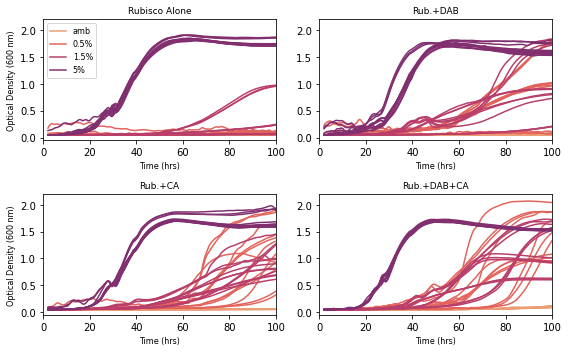

In [7]:
# Zoom in on cases that are interesting for our models.
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,5))

xlim = (0, 100)
ylim = (-0.05, 2.2)

# Plot the futile cycle data below
rub_alone = "cLS/AGFP"
futile_cycle = "cLS/Dab2-Can"
plus_transport = "cLS/Dab2-dCan"
plus_ca = "cLS/dDab2-Can"
double_neg = "cLS/dDab2-dCan"
strain_names = [rub_alone, plus_transport, plus_ca, futile_cycle]
titles = 'Rubisco Alone,Rub.+DAB,Rub.+CA,Rub.+DAB+CA'.split(',')

pal = sns.color_palette('flare', n_colors=12)
for strain, ax in zip(strain_names, axs.flatten()):
    plt.sca(ax)
    for j, my_df in enumerate(co2_dfs_futcyc):
        cols = [c for c in my_df.columns if c.startswith(strain)]
        time_h = my_df.time_s / 60 / 60
        label = co2_conds[j]
        for col in cols:
            ods = my_df[col].rolling(3).mean().rolling(3).mean()
            plt.plot(time_h, ods, color=pal[3*j], label=label)
            label = None
    
for i, (title, ax) in enumerate(zip(titles, axs.flatten())):
    plt.sca(ax)
    plt.title(title, fontsize=9)
    plt.xlabel('Time (hrs)', fontsize=8)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    if i == 0:
        plt.legend(fontsize=8)
    if i % 2 == 0:
        plt.ylabel('Optical Density (600 nm)', fontsize=8)

plt.tight_layout()
plt.savefig('figures/fig4/fig4_S2_growth_curves.png', dpi=600, facecolor='w')
plt.show()


In [8]:
# Make DataFrames with blanked endpoint data for encapsulation and futile cycle data.
data_dict = {}
for cond, df in zip(co2_conds, co2_dfs_encap):
    columns = df.columns
    blank_cols = [c for c in columns if c.startswith('BLANK')]
    blank_val = df[blank_cols].mean().mean()
    blanked_df = df.copy()
    blanked_df[blanked_df.columns[4:]] -= blank_val
    cols2drop = blank_cols + list(columns[:4])
    mean_df = blanked_df.drop(cols2drop, axis=1).rolling(5).mean()
    endpoint_series = mean_df.iloc[-1]
    data_dict[cond] = endpoint_series

encap_endpoint_df = pd.DataFrame(data_dict)
encap_endpoint_df['strain'] = [idx.split('.')[0] for idx in encap_endpoint_df.index]
encap_endpoint_df = encap_endpoint_df.melt(id_vars=['strain'], value_name='endpoint_OD', var_name='CO2')

data_dict = {}
for cond, df in zip(co2_conds, co2_dfs_futcyc):
    columns = df.columns
    blank_cols = [c for c in columns if c.startswith('Blank')]
    blank_val = df[blank_cols].mean().mean()
    blanked_df = df.copy()
    blanked_df[blanked_df.columns[4:]] -= blank_val
    cols2drop = blank_cols + list(columns[:4])
    mean_df = blanked_df.drop(cols2drop, axis=1).rolling(5).mean()
    endpoint_series = mean_df.iloc[-1]
    data_dict[cond] = endpoint_series
    
futcyc_endpoint_df = pd.DataFrame(data_dict)
futcyc_endpoint_df['strain'] = [idx.split(' ')[0] for idx in futcyc_endpoint_df.index]
futcyc_endpoint_df = futcyc_endpoint_df.melt(id_vars=['strain'], value_name='endpoint_OD', var_name='CO2')

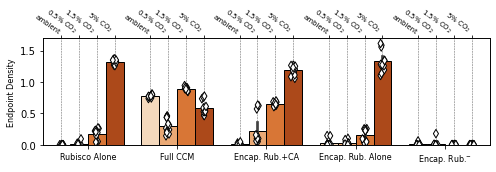

In [9]:
# Encapsulation figure
fig, ax = plt.subplots(figsize=(7,2.5))

strip_pal = ['w']*4
oranges = sns.color_palette('Oranges', n_colors=4)
greys = sns.color_palette('Greys')

sns.barplot(data=encap_endpoint_df,
            x='strain', y='endpoint_OD', hue='CO2',
            order=strain_names_encap, hue_order=co2_conds,
            dodge=0.25, edgecolor='k', palette=oranges)
sns.stripplot(data=encap_endpoint_df,
              x='strain', y='endpoint_OD', hue='CO2', 
              order=strain_names_encap, hue_order=co2_conds, dodge=0.25,
              size=6, marker='d', edgecolor='k', linewidth=1, palette=strip_pal)
xlocs = np.arange(len(titles_encap))
plt.xticks(xlocs, titles_encap, fontsize=8)
plt.xlabel('')
plt.ylim(0, plt.gca().get_ylim()[1])
plt.ylabel('Endpoint Density', fontsize=8)
plt.legend().set_visible(False)

xticks = np.arange(0, 0.8, 0.2) - 0.3
xticks = np.hstack([xticks, xticks+1, xticks+2, xticks+3, xticks+4])
xtick_str = 'ambient,0.5% CO$_2$,1.5% CO$_2$,5% CO$_2$'.split(',')*5

for xpos in xticks:
    plt.axvline(xpos, ls='--', lw=0.5, zorder=-1, color=greys[-2])

axT = plt.gca().twiny()
plt.sca(axT)
plt.xlim(ax.get_xlim())
plt.xticks(xticks, xtick_str, ha='right', rotation=-35, fontsize=7)
plt.tick_params(pad=0)

plt.tight_layout()
plt.savefig('figures/fig3/fig3_encapsulation.png', dpi=600, facecolor='w')
plt.show()

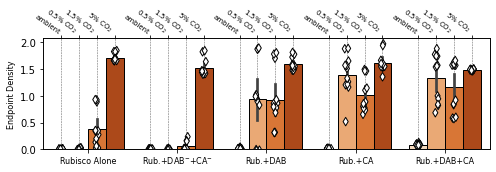

In [10]:
# Futile cycle figure
fig, ax = plt.subplots(figsize=(7,2.5))

strip_pal = ['w']*4
oranges = sns.color_palette('Oranges', n_colors=4)
greys = sns.color_palette('Greys')

sns.barplot(data=futcyc_endpoint_df,
            x='strain', y='endpoint_OD', hue='CO2',
            order=strain_names_futcyc, hue_order=co2_conds,
            dodge=0.25, edgecolor='k', palette=oranges)
sns.stripplot(data=futcyc_endpoint_df,
              x='strain', y='endpoint_OD', hue='CO2',
              order=strain_names_futcyc, hue_order=co2_conds, dodge=0.25,
              size=6, marker='d', edgecolor='k', linewidth=1, palette=strip_pal)
xlocs = np.arange(len(titles_futcyc))
plt.xticks(xlocs, titles_futcyc, fontsize=8, va='baseline')
plt.gca().xaxis.set_tick_params(pad=10)
plt.xlabel('')
plt.ylim(0, plt.gca().get_ylim()[1])
plt.ylabel('Endpoint Density', fontsize=8)
plt.yticks(np.arange(0, 2.1, 0.5))
plt.legend().set_visible(False)

xticks = np.arange(0, 0.8, 0.2) - 0.3
xticks = np.hstack([xticks, xticks+1, xticks+2, xticks+3, xticks+4])
xtick_str = 'ambient,0.5% CO$_2$,1.5% CO$_2$,5% CO$_2$'.split(',')*5

for xpos in xticks:
    plt.axvline(xpos, ls='--', lw=0.5, zorder=-1, color=greys[-2])

axT = plt.gca().twiny()
plt.sca(axT)
plt.xlim(ax.get_xlim())
plt.xticks(xticks, xtick_str, ha='right', rotation=-35, fontsize=7)
plt.tick_params(pad=0)

plt.tight_layout()
plt.savefig('figures/fig4/fig4_futile_cycle.png', dpi=600, facecolor='w')
plt.show()

<ipython-input-11-ce4609eae55b>:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


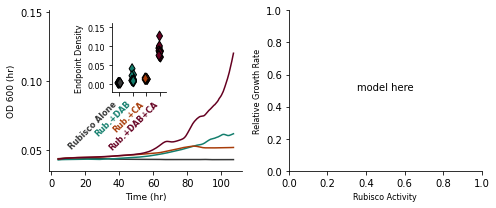

In [11]:
##### Futile cycle ambient zoom in.
# Need to figure out colors & placement for main text.
fig, axs = plt.subplots(figsize=(7,3), ncols=2)

rub_alone = "cLS/AGFP"
futile_cycle = "cLS/Dab2-Can"
plus_transport = "cLS/Dab2-dCan"
plus_ca = "cLS/dDab2-Can"
double_neg = "cLS/dDab2-dCan"
strain_names = [rub_alone, plus_transport, plus_ca, futile_cycle]
titles = 'Rubisco Alone,Rub.+DAB,Rub.+CA,Rub.+DAB+CA'.split(',')

# Left axis - data
plt.sca(axs[0])
# Outer plot - timecourse data for futile cycle
amb_df = co2_dfs_futcyc[0]

pal = ['dark grey', 'blue green', 'rust', 'maroon',]
pal = sns.xkcd_palette(pal)
for i, strain in enumerate(strain_names):
    cols = ['{0} 2.2'.format(strain)]
    time_h = amb_df.time_s / 60 / 60
    label = titles[i]
    for col in cols:
        ods = amb_df[col].rolling(5).mean().rolling(5).mean()
        plt.plot(time_h, ods, color=pal[i], label=label)
        label = None

plt.legend(loc=1, fontsize=7).set_visible(False)
plt.xlabel('Time (hr)', fontsize=9)
plt.ylabel('OD 600 (hr)', fontsize=9)
plt.ylim(0.035, 0.151)
plt.yticks(np.arange(0.05, 0.151, 0.05))

ax0 = plt.gca()
axins = inset_axes(ax0, width=0.75, height=0.95, loc=2,
                   bbox_to_anchor=(.3, .45, .6, .5),
                   bbox_transform=ax0.transAxes)
plt.sca(axins)

mask = futcyc_endpoint_df['CO2'] == 'amb'
amb_endpoint_df = futcyc_endpoint_df[mask]
#sns.barplot(data=amb_endpoint_df, x='strain', y='endpoint_OD', order=strain_names,
#            edgecolor='k', lw=1, palette=pal)
sns.stripplot(data=amb_endpoint_df, x='strain', y='endpoint_OD', order=strain_names,
              marker='d', color='w', edgecolor='k', linewidth=1, size=7, palette=pal)

plt.xticks(np.arange(len(titles)), titles, fontsize=8, rotation=45, ha='right', weight='bold')
plt.yticks(np.arange(0.0, 0.151, 0.05), fontsize=8)

plt.xlabel('')
plt.ylim(-0.02, 0.16)
plt.xlim(-0.5, 3.5)
plt.ylabel('Endpoint Density', fontsize=8)
sns.despine()

for ticklabel, tickcolor in zip(axins.get_xticklabels(), pal):
    ticklabel.set_color(tickcolor)
    
# Right axis - model
plt.sca(axs[1])
plt.text(0.5, 0.5, 'model here', ha='center')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Rubisco Activity', fontsize=8)
plt.ylabel('Relative Growth Rate', fontsize=8)

plt.tight_layout()
plt.savefig('figures/fig6/fig6_futile_cycle_amb.png', dpi=600, facecolor='w')
plt.show()


In [12]:
amb_endpoint_df

,strain,CO2,endpoint_OD
0,Doubled,amb,NaN
1,Doubled,amb,NaN
2,Doubled,amb,NaN
3,Doubled,amb,NaN
4,Doubled,amb,NaN
...,...,...,...
91,cLS/dDab2-dCan,amb,0.002555
92,cLS/dDab2-dCan,amb,0.003335
93,cLS/dDab2-dCan,amb,0.002895
94,cLS/dDab2-dCan,amb,0.003895


In [13]:
sns.xkcd_palette?

Signature: sns.xkcd_palette(colors)
Docstring:
Make a palette with color names from the xkcd color survey.

See xkcd for the full list of colors: https://xkcd.com/color/rgb/

This is just a simple wrapper around the ``seaborn.xkcd_rgb`` dictionary.

Parameters
----------
colors : list of strings
    List of keys in the ``seaborn.xkcd_rgb`` dictionary.

Returns
-------
palette : seaborn color palette
    Returns the list of colors as RGB tuples in an object that behaves like
    other seaborn color palettes.

See Also
--------
crayon_palette : Make a palette with Crayola crayon colors.
File:      ~/Library/Python/3.8/lib/python/site-packages/seaborn/palettes.py
Type:      function
